In [1]:
pip install  pandas matplotlib numpy seaborn statsmodels geopandas fuzzywuzzy


  Using cached pandas-2.2.2-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached numpy-2.1.0-cp312-cp312-win_amd64.whl.metadata (59 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached statsmodels-0.14.2-cp312-cp312-win_amd64.whl.metadata (9.5 kB)
  Using cached geopandas-1.0.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached fuzzywuzzy-0.18.0-py2.py3-none-any.whl.metadata (4.9 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp312-cp312-win_amd64.whl.metadata (165 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached pillow-10.4.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using ca

In [2]:
import geopandas as gpd
#load geojson
bogota_gdf = gpd.read_file("../data/poligonos-localidades.geojson")
bogota_gdf.head(20)


,Nombre de la localidad,Acto administrativo de la localidad,Area de la localidad,Identificador unico de la localidad,geo_point_2d,geometry
0,CIUDAD BOLIVAR,Acuerdo 14 de 1983,"130002593,080624",19,"{ ""lon"": -74.161958904406518, ""lat"": 4.4824602...","MULTIPOLYGON (((-74.18135 4.58892, -74.18092 4..."
1,SUBA,Acuerdo 8 de 1977,"100560477,718254",11,"{ ""lon"": -74.075845275546897, ""lat"": 4.7632081...","MULTIPOLYGON (((-74.0345 4.82547, -74.03489 4...."
2,RAFAEL URIBE URIBE,Acuerdo 117 de 2003,"13834084,806513",18,"{ ""lon"": -74.113363182935245, ""lat"": 4.5664769...","MULTIPOLYGON (((-74.12803 4.59254, -74.12829 4..."
3,KENNEDY,Acuerdo 8 de 1977,"38589733,814235",08,"{ ""lon"": -74.152667623833821, ""lat"": 4.6303473...","MULTIPOLYGON (((-74.1183 4.63741, -74.11854 4...."
4,USME,Acuerdo 15 de 1993,"215066686,644374",05,"{ ""lon"": -74.142806495819357, ""lat"": 4.3900251...","MULTIPOLYGON (((-74.05597 4.50832, -74.05599 4..."
5,LOS MARTIRES,Acuerdo 8 de 1977,"6514046,260403",14,"{ ""lon"": -74.08794786812679, ""lat"": 4.60715593...","MULTIPOLYGON (((-74.07283 4.61542, -74.07296 4..."
6,ANTONIO NARIÑO,Acuerdo 117 de 2003,"4879543,386426",15,"{ ""lon"": -74.102842400614492, ""lat"": 4.5887706...","MULTIPOLYGON (((-74.13075 4.59335, -74.13075 4..."
7,TEUSAQUILLO,Acuerdo 8 de 1977,"14193168,127546",13,"{ ""lon"": -74.085769019581434, ""lat"": 4.6411735...","MULTIPOLYGON (((-74.09372 4.66607, -74.10342 4..."
8,SUMAPAZ,Acuerdo 9 de 1986,"780968757,719072",20,"{ ""lon"": -74.256978718004689, ""lat"": 4.0365687...","MULTIPOLYGON (((-74.20584 4.26966, -74.20567 4..."
9,SAN CRISTOBAL,Acuerdo 117 de 2003,"49098548,52917",04,"{ ""lon"": -74.066072560506484, ""lat"": 4.5487490...","MULTIPOLYGON (((-74.029 4.5583, -74.02892 4.55..."


## Data Transformation and Preparation

In [3]:

import pandas as pd
from fuzzywuzzy import fuzz
mpox=pd.read_csv('../data/osb_enftransm_mpox23082024.csv', sep=';', encoding='ISO-8859-1', parse_dates=True)
print(mpox.info())


'''
This function takes a name and a list of names and returns the best match. If the score is above the threshold -1 is returned.
Why? 
mpox dataframe has a column called 'Localidad' and bogota_gdf has a column called 'Nombre de la localidad'. 
Both columns have the same information but the names are not exactly the same. 
This function will help us to match the names of the localities in both dataframes.
'''
def match_names(name, list_names, min_score=0):
    # -1 score to the name
    max_score = -1
    # Returning empty name for no match
    max_name = ""
    for name2 in list_names:
        # Finding fuzzy match score
        score = fuzz.ratio(name.lower(), name2.lower())
        # Checking if the score is greater than the minimum score
        if (score > min_score) & (score > max_score):
            max_name = name2
            max_score = score
    return (max_name, max_score)

#Create localities dataframe in order to match the names of the localities in both dataframes
dict_list = []
for name in mpox['Locality'].unique():
    # Use the function to find best match, we can set a threshold here
    match = match_names(name, bogota_gdf['Nombre de la localidad'].unique(), 60)
    # New dict for storing data
    dict_ = {}
    dict_.update({"locality_name" : name})
    dict_.update({"match_name" : match[0]})
    dict_.update({"score" : match[1]})
    dict_list.append(dict_)
    
    
localities= pd.DataFrame(dict_list)
localities.head(100)

#Merge mpox and localities dataframes
mpox = mpox.merge(localities, left_on='Locality', right_on='locality_name', how='left')

#Count of cases by locality
mpox_case_counts = mpox[mpox['Patient_Status'] != 'DESCARTADO'].groupby('match_name').size().reset_index(name='Case Count')
#Count of cases by locality and Genre
mpox_genres_count = mpox[mpox['Patient_Status'] != 'DESCARTADO'].groupby(['match_name','Genre']).size().reset_index(name='Case Count')
mpox_genres_count['Case Count'] = mpox_genres_count['Case Count'].astype(int)
mpox_case_counts.head(100)
mpox_genres_count.head(100)

mpox_genres_count = mpox_genres_count.pivot(index='match_name', columns='Genre', values='Case Count').reset_index()
mpox_genres_count = mpox_genres_count.fillna(0)
mpox_genres_count['F'] = mpox_genres_count['F'].astype(int)
mpox_genres_count['M'] = mpox_genres_count['M'].astype(int)
mpox_genres_count.head(100)

#Merge bogota_gdf with mpox_case_counts and mpox_genres_count
merged_gdf = bogota_gdf.merge(mpox_case_counts, left_on='Nombre de la localidad', right_on='match_name', how='left')

# Merge with mpox_genres_count
merged_gdf = merged_gdf.merge(mpox_genres_count, on='match_name', how='left')
merged_gdf = merged_gdf.fillna(0)
merged_gdf['F'] = merged_gdf['F'].astype(int)
merged_gdf['M'] = merged_gdf['M'].astype(int)
merged_gdf.head(100)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3843 entries, 0 to 3842
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Record_Date     3843 non-null   object
 1   Symptoms_Date   3843 non-null   object
 2   Locality        3843 non-null   object
 3   Age             3843 non-null   int64 
 4   Genre           3843 non-null   object
 5   Patient_Status  3840 non-null   object
dtypes: int64(1), object(5)
memory usage: 180.3+ KB
None


,Nombre de la localidad,Acto administrativo de la localidad,Area de la localidad,Identificador unico de la localidad,geo_point_2d,geometry,match_name,Case Count,F,M
0,CIUDAD BOLIVAR,Acuerdo 14 de 1983,"130002593,080624",19,"{ ""lon"": -74.161958904406518, ""lat"": 4.4824602...","MULTIPOLYGON (((-74.18135 4.58892, -74.18092 4...",CIUDAD BOLIVAR,77.0,2,75
1,SUBA,Acuerdo 8 de 1977,"100560477,718254",11,"{ ""lon"": -74.075845275546897, ""lat"": 4.7632081...","MULTIPOLYGON (((-74.0345 4.82547, -74.03489 4....",SUBA,265.0,4,261
2,RAFAEL URIBE URIBE,Acuerdo 117 de 2003,"13834084,806513",18,"{ ""lon"": -74.113363182935245, ""lat"": 4.5664769...","MULTIPOLYGON (((-74.12803 4.59254, -74.12829 4...",RAFAEL URIBE URIBE,61.0,4,57
3,KENNEDY,Acuerdo 8 de 1977,"38589733,814235",08,"{ ""lon"": -74.152667623833821, ""lat"": 4.6303473...","MULTIPOLYGON (((-74.1183 4.63741, -74.11854 4....",KENNEDY,234.0,10,224
4,USME,Acuerdo 15 de 1993,"215066686,644374",05,"{ ""lon"": -74.142806495819357, ""lat"": 4.3900251...","MULTIPOLYGON (((-74.05597 4.50832, -74.05599 4...",USME,31.0,1,30
5,LOS MARTIRES,Acuerdo 8 de 1977,"6514046,260403",14,"{ ""lon"": -74.08794786812679, ""lat"": 4.60715593...","MULTIPOLYGON (((-74.07283 4.61542, -74.07296 4...",LOS MARTIRES,28.0,0,28
6,ANTONIO NARIÑO,Acuerdo 117 de 2003,"4879543,386426",15,"{ ""lon"": -74.102842400614492, ""lat"": 4.5887706...","MULTIPOLYGON (((-74.13075 4.59335, -74.13075 4...",ANTONIO NARIÑO,20.0,1,19
7,TEUSAQUILLO,Acuerdo 8 de 1977,"14193168,127546",13,"{ ""lon"": -74.085769019581434, ""lat"": 4.6411735...","MULTIPOLYGON (((-74.09372 4.66607, -74.10342 4...",TEUSAQUILLO,129.0,0,129
8,SUMAPAZ,Acuerdo 9 de 1986,"780968757,719072",20,"{ ""lon"": -74.256978718004689, ""lat"": 4.0365687...","MULTIPOLYGON (((-74.20584 4.26966, -74.20567 4...",0,0.0,0,0
9,SAN CRISTOBAL,Acuerdo 117 de 2003,"49098548,52917",04,"{ ""lon"": -74.066072560506484, ""lat"": 4.5487490...","MULTIPOLYGON (((-74.029 4.5583, -74.02892 4.55...",SAN CRISTOBAL,58.0,0,58


## GeoSpatial Analyses

31.64814814814815
14.12098319230147
32.42118601115053
8.033998320800654


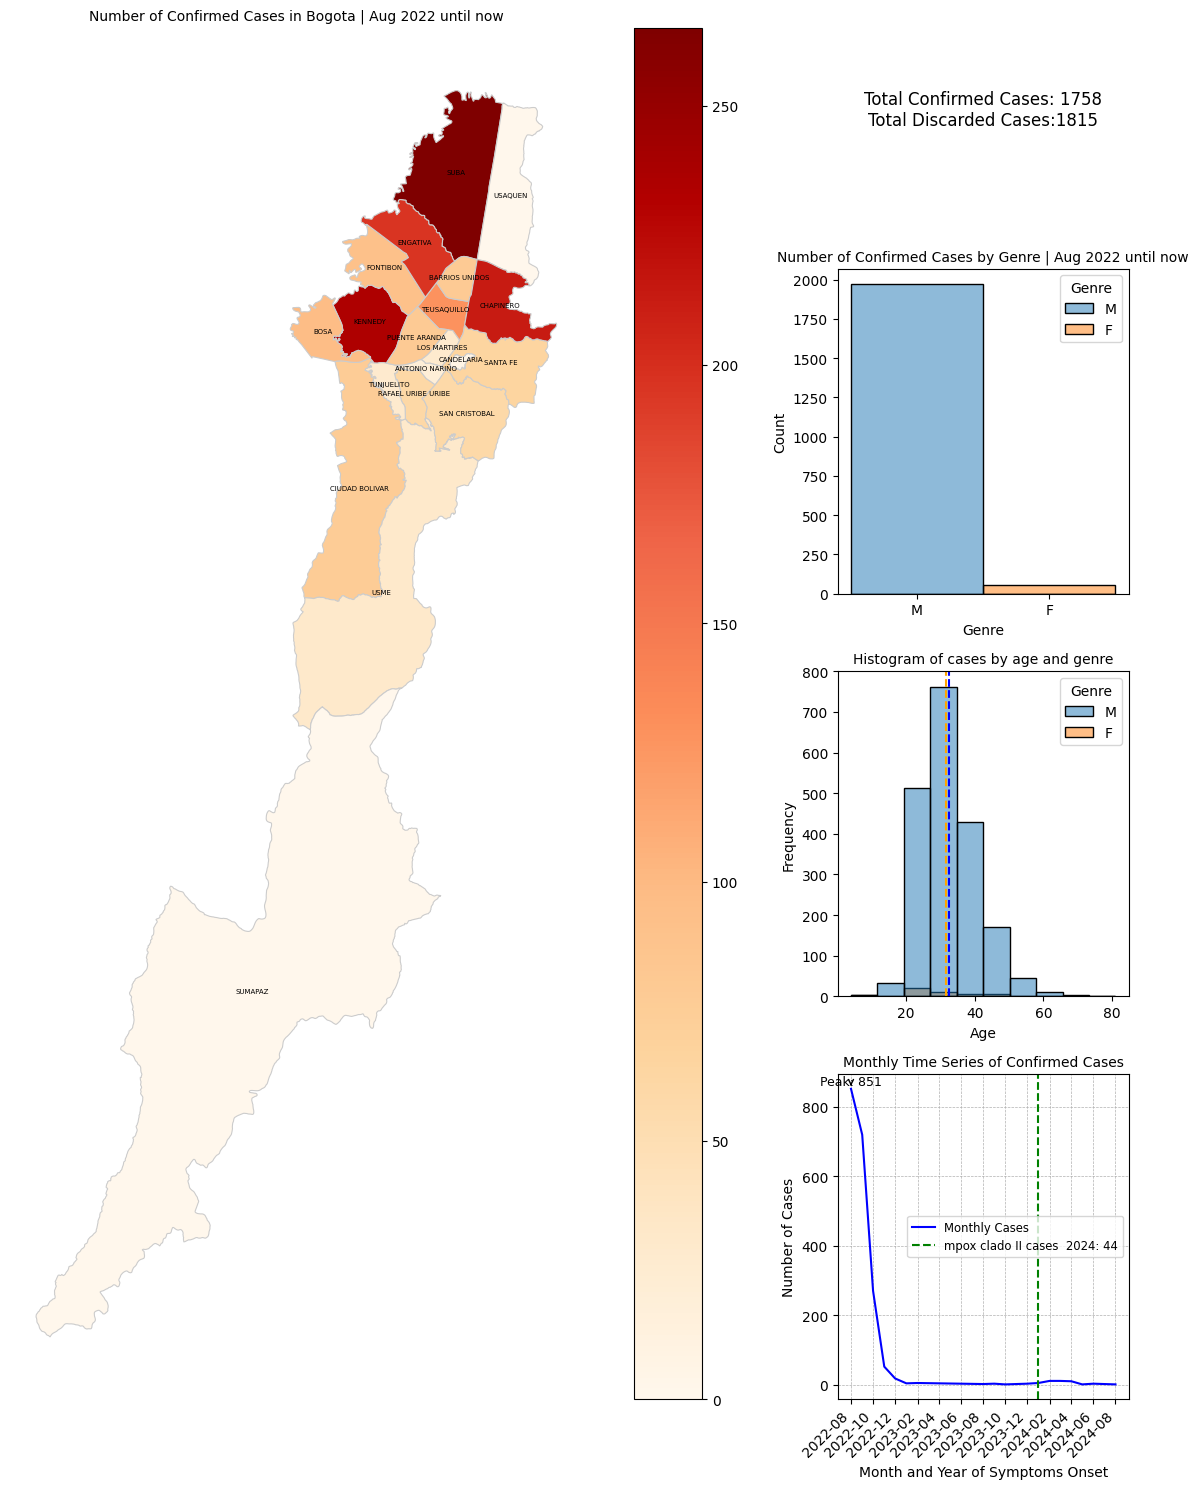

In [53]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import numpy as np
import seaborn as sns

# Assuming your GeoDataFrame is called merged_gdf

# Check if 'Case Count' is populated (this should have been calculated before this step)
if merged_gdf['Case Count'].isnull().all():
    print("The 'Case Count' column is not populated. Please ensure it has been calculated.")

# Calculate total confirmed cases
total_confirmed_cases = merged_gdf['Case Count'].sum()
# Calculate total discarded cases
total_discarded_cases = mpox[mpox['Patient_Status'] == 'DESCARTADO'].count()['Patient_Status'] 

# Creating a 3x2 grid layout with the first column spanning all rows
fig = plt.figure(figsize=(14, 15))  # Increased the figure size to accommodate more plots
gs = gridspec.GridSpec(4, 2, width_ratios=[7, 2], height_ratios=[0.5, 1, 1, 1])

# First plot: Map on the left spanning all rows
ax_map = fig.add_subplot(gs[:, 0])  # Span the entire first column
merged_gdf.plot(column='Case Count', cmap='OrRd', linewidth=0.8, ax=ax_map, edgecolor='0.8', legend=True)

# Plot centroids and labels on the map
bogota_projected = merged_gdf.to_crs(epsg=3116)
centroids = bogota_projected.geometry.centroid
centroids_geo = centroids.to_crs(merged_gdf.crs)

for x, y, label in zip(centroids_geo.x, centroids_geo.y, merged_gdf['Nombre de la localidad']):
    ax_map.text(x, y, f'{label}', fontsize=5, ha='center', zorder=1)

ax_map.set_title('Number of Confirmed Cases in Bogota | Aug 2022 until now', fontsize=10)
ax_map.set_axis_off()

# Second plot: Total confirmed cases label
ax_label = fig.add_subplot(gs[0, 1])
ax_label.text(0.5, 0.5, f'Total Confirmed Cases: {int(total_confirmed_cases)}\nTotal Discarded Cases:{total_discarded_cases}', fontsize=12, ha='center', va='center')
ax_label.set_axis_off()

# Third plot: Histogram by Genre in the middle-right
ax_hist_genre = fig.add_subplot(gs[1, 1])
sns.histplot(data=mpox[mpox['Patient_Status'] != 'DESCARTADO'], x='Genre', hue='Genre', stat='count', bins=10, ax=ax_hist_genre)
ax_hist_genre.set_title('Number of Confirmed Cases by Genre | Aug 2022 until now', fontsize=10)

# Fourth plot: Histogram by Age and Genre in the bottom-right
filtered_mpox = mpox[mpox['Patient_Status'] != 'DESCARTADO']
mean_f = filtered_mpox[filtered_mpox['Genre'] == 'F']['Age'].mean()
std_f = filtered_mpox[filtered_mpox['Genre'] == 'F']['Age'].std()
print(mean_f)
print(std_f)

mean_m = filtered_mpox[filtered_mpox['Genre'] == 'M']['Age'].mean()
std_m = filtered_mpox[filtered_mpox['Genre'] == 'M']['Age'].std()
print(mean_m)
print(std_m)

ax_hist_genre_age = fig.add_subplot(gs[2, 1])
sns.histplot(data=mpox[mpox['Patient_Status'] != 'DESCARTADO'], x='Age', hue='Genre', bins=10, ax=ax_hist_genre_age, legend=True)

ax_hist_genre_age.axvline(mean_f, color='orange', linestyle='--', label=f'Age Female Mean: {mean_f:.2f}')


ax_hist_genre_age.axvline(mean_m, color='blue', linestyle='--', label=f'Age Male Mean: {mean_m:.2f}')

ax_hist_genre_age.set_xlabel('Age')
ax_hist_genre_age.set_ylabel('Frequency')
ax_hist_genre_age.set_title('Histogram of cases by age and genre', fontsize=10)



# Fifth plot: Time series plot using Symptoms_Date in the bottom-right
ax_time_series = fig.add_subplot(gs[3, 1])
mpox['Symptoms_Date'] = pd.to_datetime(mpox['Symptoms_Date'], format='%d/%m/%Y',errors='coerce') # Ensure that Symptoms_Date is in datetime format
# Filter out any rows where the date couldn't be parsed (NaT)
mpox = mpox.dropna(subset=['Symptoms_Date'])

# Filter the data to include only dates from August 2022 onward
mpox_aug_2022 = mpox[mpox['Symptoms_Date'] >= '2022-08-01'].copy()
time_series_data = mpox_aug_2022[mpox_aug_2022['Patient_Status'] != 'DESCARTADO'].groupby('Symptoms_Date').size()
#time_series_data.plot(ax=ax_time_series)
#ax_time_series.set_xlabel('Date of Symptoms Onset')
#ax_time_series.set_ylabel('Number of Cases')
#ax_time_series.set_title('Time Series of Confirmed Cases', fontsize=10)

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates



# Group the data by month and calculate the sum of cases for each month
monthly_time_series_data = mpox_aug_2022[mpox_aug_2022['Patient_Status'] != 'DESCARTADO'].groupby(mpox_aug_2022['Symptoms_Date'].dt.to_period('M')).size()

# Convert the PeriodIndex to a datetime index for better plotting
monthly_time_series_data.index = monthly_time_series_data.index.to_timestamp()

# Plot the monthly time series data

monthly_time_series_data.plot(ax=ax_time_series, label='Monthly Cases', color='blue')

# Add a 3-month moving average to smooth the data
#monthly_time_series_data_ma = monthly_time_series_data.rolling(window=3).mean()
#monthly_time_series_data_ma.plot(ax=ax_time_series, label='3-Month Moving Average', color='red', linestyle='--')

# Annotate the highest peak
peak_date = monthly_time_series_data.idxmax()
peak_value = monthly_time_series_data.max()
ax_time_series.annotate(f'Peak: {peak_value}', xy=(peak_date, peak_value), xytext=(peak_date, peak_value + 10),
                        arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=9, ha='center')

# Highlight a significant month
significant_date = pd.Timestamp('2024-01-01')
ax_time_series.axvline(significant_date, color='green', linestyle='--', label='mpox clado II cases  2024: 44')
ax_time_series.text(significant_date, max(monthly_time_series_data), "" , color='green', rotation=90, ha='center')

# Add gridlines and improve date formatting
ax_time_series.grid(True, which='both', linestyle='--', linewidth=0.5)

# Format x-axis labels to show year and month
ax_time_series.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax_time_series.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1, interval=2))  # Show every two months

# Rotate x-axis labels by 45 degrees
plt.setp(ax_time_series.get_xticklabels(), rotation=45, ha="right")

# Set labels and title
ax_time_series.set_xlabel('Month and Year of Symptoms Onset')
ax_time_series.set_ylabel('Number of Cases')
ax_time_series.set_title('Monthly Time Series of Confirmed Cases', fontsize=10)

# Show the legend
ax_time_series.legend(fontsize='small')

plt.tight_layout()
plt.show()
